# Content and Objective

+ Show estimation of psd w. Blackman-Tukey
+ Method: Get noise and filtered noise, and perform psd estimation

In [1]:
# importing
import numpy as np
from scipy import signal
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(30, 8) )

# Helper Functions

### Define Function for Estimating ACF

In [3]:
########################
# acf estimator
########################
def est_acf(y, est_type):
    """
    estimates acf given a number of observation
    
    Remark: signal is assumed to be starting from 0 to length(y)-1
    
    IN: observations y, est_type (biased / unbiased)
    OUT: estimated acf, centered around 0
    """
    
    N = np.size( y )
    r = np.zeros_like( y )
    
    # loop lags of acf
    for k in np.arange(0, N):
        
        temp = np.sum( y[k:N] * np.conjugate(y[0:(N-k)]) )

        # type of estimator
        if est_type == 'biased':
            r[k] = temp/N
        elif est_type == 'unbiased':
            r[k] = temp/(N-k)
        
    # find values for negative indices
    r_reverse = np.conjugate(r[::-1])     
   
    return  np.append(r_reverse[0:len(r)-1], r)  

### Functions for estimating spectra 

In [4]:
########################
# periodogram estimator
########################
def find_periodogram(y, omega):
    """
    estimates periodogram out of the given observation at the frequencies specified in omega
    
    IN: observation y, frequencies
    OUT: psd estimator
    """
    N = len(y)
    per = np.zeros(len(omega), dtype=complex) 
        
    for p in np.arange(0, N):
        per += y[p] * np.exp( -1j * omega * (p+1) )
        
    per = ( abs(per)**2 )/ N
        
    return per  

########################
# correlogram estimator
########################
def find_correlogram(r, omega):
    """
    estimates correlogram out of the given acf at the frequencies specified in omega
    
    Remark: acf is assumed to be centered around 0
    
    IN: acf r, frequencies
    OUT: psd
    """
    corr = np.zeros(len(omega), dtype=complex )
  
    N = (len(r)+1)// 2
    
    # adding all terms
    for p in np.arange( -(N-1), (N-1)+1 ):
        corr += r[ p + (N-1) ] * np.exp( -1j * omega * p )

    # since there are minor numerical issues, resulting in negligible imaginary part, only real part is returned
    return np.real( corr )

# Parameters

In [5]:
# parameters: number of samples and according length of acf
N = int( 1e2 )
N_acf_range = np.arange( - N + 1, N, 1 )

M = N // 5

# number of realizations for averaging    
N_real = int( 1e2 )

# number of freq. points and freq. range
N_freq = 512            
Ome = np.linspace(-np.pi, np.pi, N_freq)


# filtering noise?!
filtered = 1

# Define windows and show their behavior

In [6]:
# define windows
rect = np.concatenate( ( np.zeros(N-M), np.ones( 2 * M ), np.zeros( N-1-M) ) )
tria = np.concatenate( ( np.zeros(N-M), signal.windows.triang( 2 * M ), np.zeros( N-1-M) ) )
hann = np.concatenate( ( np.zeros(N-M), signal.windows.hann( 2 * M ), np.zeros( N-1-M)) )
hamming = np.concatenate( ( np.zeros(N-M), signal.windows.hamming( 2 * M ), np.zeros( N-1-M)) )    
blackman = np.concatenate( ( np.zeros( N-M), signal.windows.blackman( 2 * M ), np.zeros( N-1-M)) ) 

In [7]:
# frequency range, applying zero-padding
zp = 8

Ome_zp = np.linspace(-np.pi, np.pi, N*zp)

RECT = find_periodogram( np.append(rect, np.zeros( (zp-1)*N )), Ome)
RECT = RECT / np.max(RECT) 

TRIA = find_periodogram( np.append(tria, np.zeros( (zp-1)*N )), Ome)
TRIA = TRIA / np.max(TRIA)

HANN = find_periodogram( np.append(hann, np.zeros( (zp-1)*N )), Ome)
HANN = HANN / np.max(HANN)

HAMMING = find_periodogram( np.append(hamming, np.zeros( (zp-1)*N )), Ome)
HAMMING = HAMMING / np.max(HAMMING)

BLACKMAN = find_periodogram( np.append(blackman, np.zeros( (zp-1)*N )), Ome)
BLACKMAN = BLACKMAN / np.max(BLACKMAN)   

<>:35: SyntaxWarning: invalid escape sequence '\O'
<>:45: SyntaxWarning: invalid escape sequence '\O'
<>:46: SyntaxWarning: invalid escape sequence '\O'
<>:35: SyntaxWarning: invalid escape sequence '\O'
<>:45: SyntaxWarning: invalid escape sequence '\O'
<>:46: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_3161/162646267.py:35: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('$|W(\Omega)|^2$ (dB)')
/tmp/ipykernel_3161/162646267.py:45: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('$\Omega$')
/tmp/ipykernel_3161/162646267.py:46: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('$|W(\Omega)|^2$ (dB)')


(np.float64(-1.0), np.float64(1.0), np.float64(-80.0), np.float64(10.0))

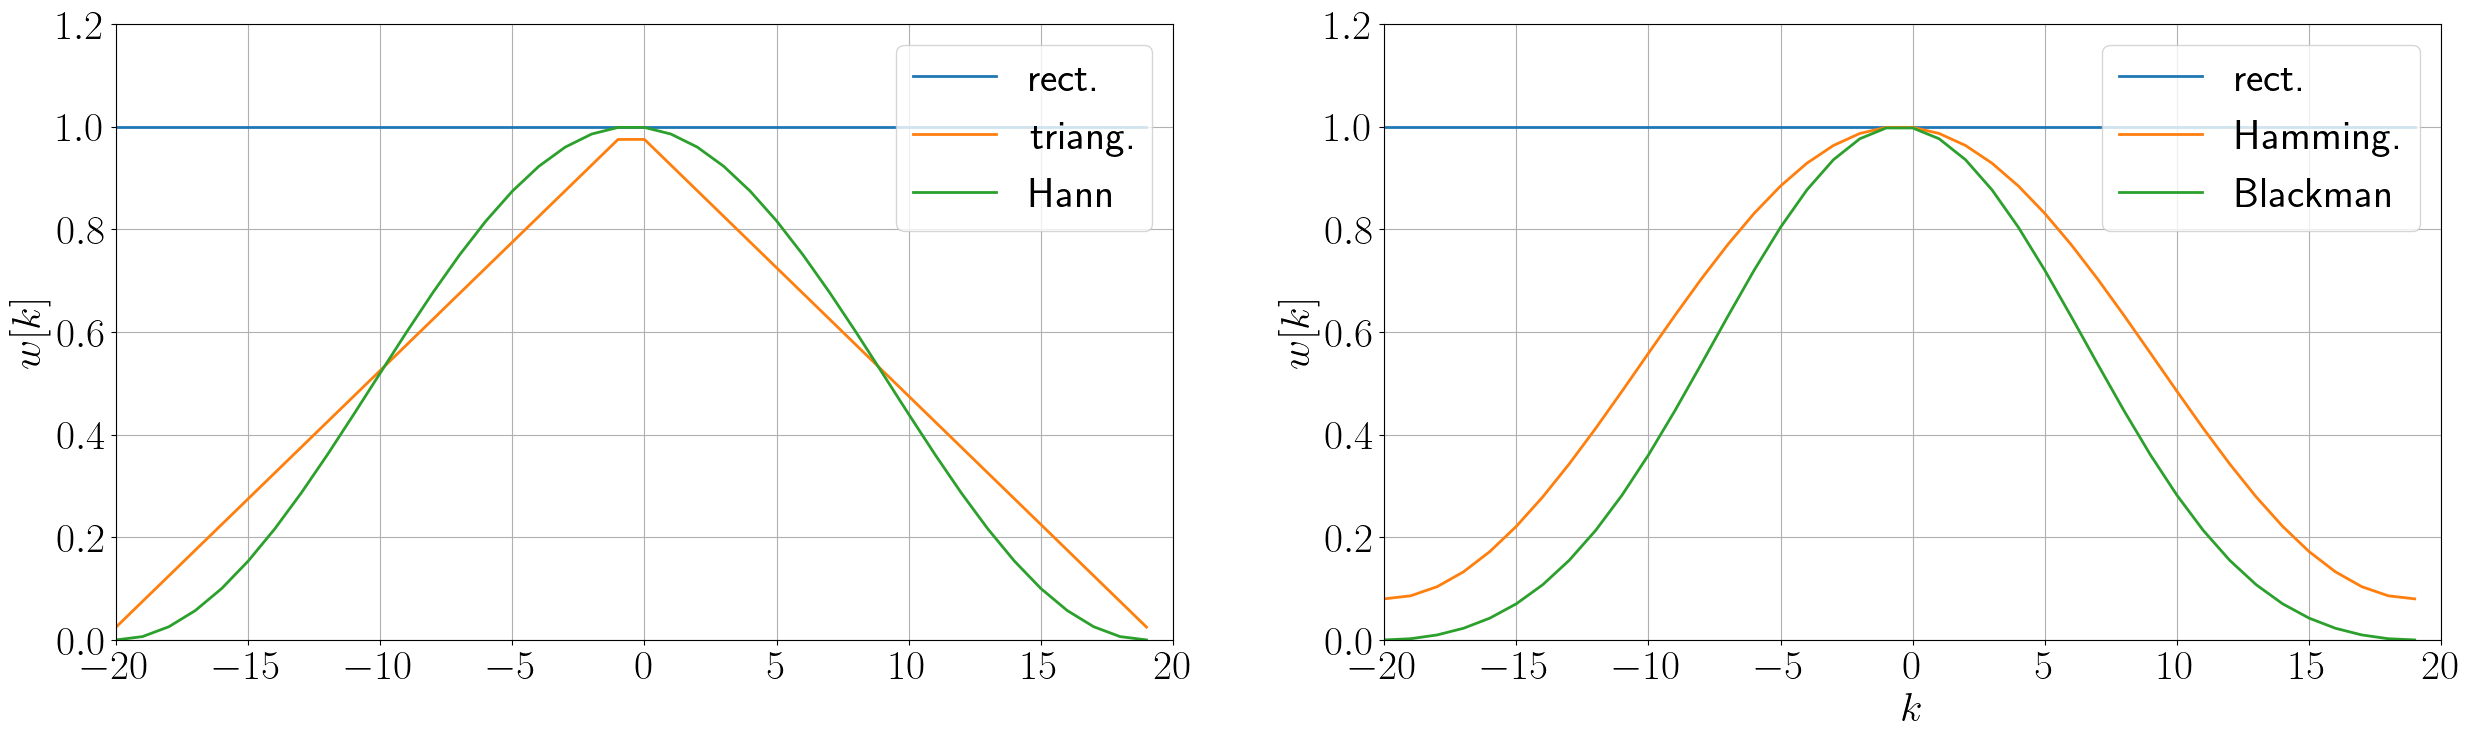

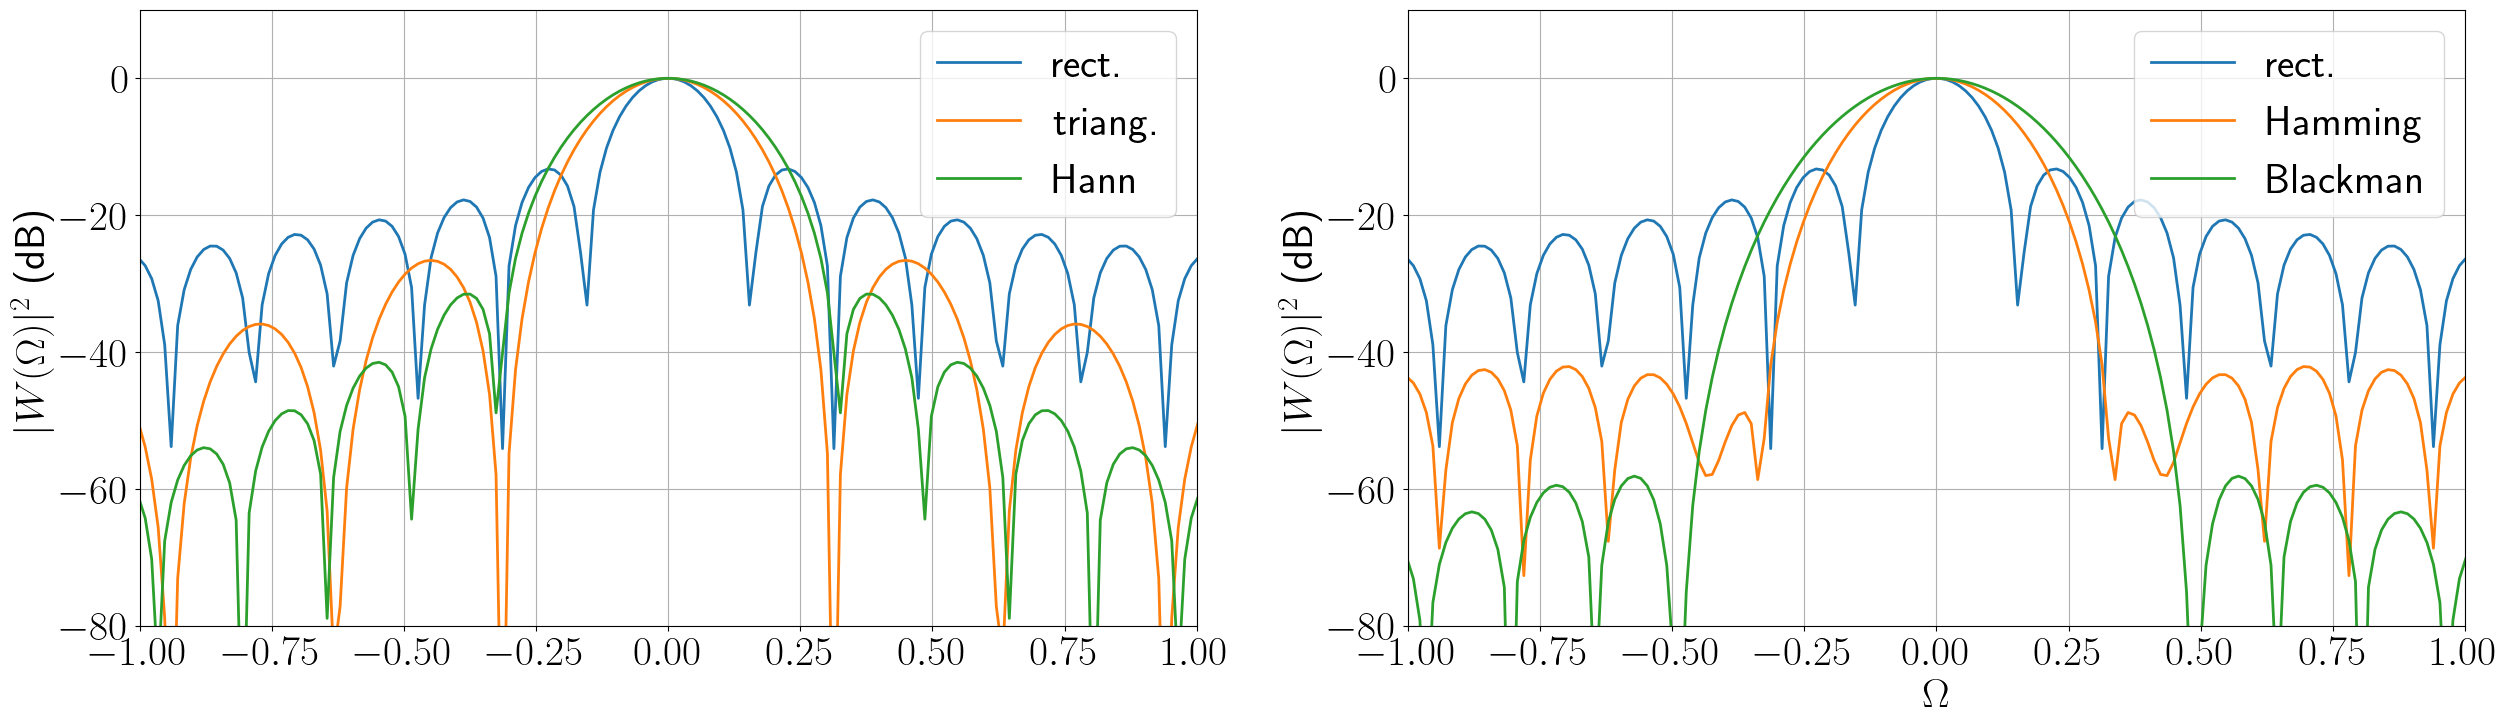

In [11]:
plt.figure()
plt.subplot(121)   

M_range = np.arange( -M, M )

plt.plot( M_range, np.ones( 2*M ), linewidth=2.0, label='rect.')
plt.plot( M_range, signal.windows.triang( 2 * M ), linewidth=2.0, label='triang.')
plt.plot( M_range, signal.windows.hann( 2 * M ), linewidth=2.0, label='Hann')

#plt.xlabel('$k$')
plt.ylabel('$w[k]$')   
plt.grid(True)    
plt.legend(loc='upper right')      
plt.axis([-M, M, 0, 1.2]) 

plt.subplot(122)   
plt.plot( M_range, np.ones( 2*M ), linewidth=2.0, label='rect.')
plt.plot( M_range, signal.windows.hamming( 2 * M ), linewidth=2.0, label='Hamming.')
plt.plot( M_range, signal.windows.blackman( 2 * M ), linewidth=2.0, label='Blackman')

plt.xlabel('$k$')
plt.ylabel('$w[k]$')   
plt.grid(True)    
plt.legend(loc='upper right')  
plt.axis([-M, M, 0, 1.2]) 


plt.figure()
plt.subplot(121)   

plt.plot(Ome, 10*np.log10(RECT), linewidth=2.0, label='rect.')
plt.plot(Ome, 10*np.log10(TRIA), linewidth=2.0, label='triang.')
plt.plot(Ome, 10*np.log10(HANN), linewidth=2.0, label='Hann')    

plt.ylabel('$|W(\Omega)|^2$ (dB)')   
plt.grid(True)    
plt.legend(loc='upper right')    
plt.axis([-1, 1, -80, 10])     

plt.subplot(122)
plt.plot(Ome, 10*np.log10(RECT), linewidth=2.0, label='rect.')
plt.plot(Ome, 10*np.log10(HAMMING), linewidth=2.0, label='Hamming')     
plt.plot(Ome, 10*np.log10(BLACKMAN), linewidth=2.0, label='Blackman')     

plt.xlabel('$\Omega$')
plt.ylabel('$|W(\Omega)|^2$ (dB)')   
plt.grid(True)    
plt.legend(loc='upper right')    
plt.axis([-1, 1, -80, 10]) 

# Loop for realizations

In [9]:
# initialize arrays for psd
psd_noise_cor_tria = np.empty( [ N_real, N_freq ], dtype=float )
psd_noise_cor_hann = np.empty( [ N_real, N_freq ], dtype=float )
psd_noise_cor_hamming = np.empty( [ N_real, N_freq ], dtype=float )
psd_noise_cor_blackman = np.empty( [ N_real, N_freq ], dtype=float )

periodo = np.empty( [ N_real , N_freq ], dtype=float )
corello = np.empty( [ N_real , N_freq ], dtype=float )

# avtivate parameter "filtered" in parameters if you like to see filtered noise
if filtered == 1:
    # filter parameters
    cutoff_freq = 1.0/4.0

    ripple_db = 60                      # ripples and transition width of the filter
    width = 1 / 5.0

    N_filter, beta = signal.kaiserord(ripple_db, width)    # find filter order and beta parameter
    
    taps = signal.firwin( N_filter, cutoff=cutoff_freq,  window=('kaiser', beta))

    
# loop for realizations
for _k in range( N_real ):
    
    # generate noise
        #y = np.sqrt(0.01) * np.random.normal( 0.0, 1.0, N )
        #y = np.sqrt(2) * np.random.normal( 0.0, 1.0, N )
        y = np.sqrt(10) * np.random.normal( 0.0, 1.0, N )
        y += np.sqrt(1.0) * np.cos(np.pi/4+np.linspace(0,N,N))
        #y += np.sqrt(0.5) * np.cos(3*np.pi/4*np.linspace(0,N,N))
        
        # activate to have filtered noise
        if filtered == 1:
            y = signal.lfilter( taps, 1.0, y )   
            y /= np.linalg.norm(y)

        # find acf estimations        
        acf_biased  = est_acf( y, 'biased') 
        
        #fft[_k, :] = np.abs(np.fft.fft(y))*2/y.size
        periodo[_k, :] = find_periodogram(y,Ome)
        corello[_k, :] = find_correlogram(acf_biased,Ome)
        
        # find correlogram
        psd_noise_cor_tria[ _k, :] = find_correlogram( acf_biased * tria, Ome)      
        psd_noise_cor_hann[ _k, :] = find_correlogram( acf_biased * hann, Ome)
        psd_noise_cor_hamming[ _k, :] = find_correlogram( acf_biased * hamming, Ome)
        psd_noise_cor_blackman[ _k, :] = find_correlogram( acf_biased * blackman, Ome)        

# get mean and std along realizations
psd_noise_cor_tria_average = psd_noise_cor_tria.mean( axis=0 )  
psd_noise_cor_tria_std = psd_noise_cor_tria.std( axis=0 )  

psd_noise_cor_hann_average = psd_noise_cor_hann.mean( axis=0 )   
psd_noise_cor_hann_std = psd_noise_cor_hann.std( axis=0 )   

psd_noise_cor_hamming_average = psd_noise_cor_hamming.mean( axis=0 ) 
psd_noise_cor_hamming_std = psd_noise_cor_hamming.std( axis=0 )  

psd_noise_cor_blackman_average = psd_noise_cor_blackman.mean( axis=0 ) 
psd_noise_cor_blackman_std = psd_noise_cor_blackman.std( axis=0 ) 

periodo_avg = periodo.mean(axis=0)
periodo_std = periodo.std(axis=0)

corello_avg = corello.mean(axis=0)
corello_std = corello.std(axis=0)

# Plotting

<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:28: SyntaxWarning: invalid escape sequence '\O'
<>:28: SyntaxWarning: invalid escape sequence '\h'
<>:38: SyntaxWarning: invalid escape sequence '\O'
<>:38: SyntaxWarning: invalid escape sequence '\h'
<>:46: SyntaxWarning: invalid escape sequence '\O'
<>:46: SyntaxWarning: invalid escape sequence '\h'
<>:54: SyntaxWarning: invalid escape sequence '\O'
<>:54: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:28: SyntaxWarning: invalid escape sequence '\O'
<>:28: SyntaxWarning: invalid escape sequence '\h'
<>:38: SyntaxWarning: invalid escape sequence '\O'
<>:38: SyntaxWarning: invalid escape sequence '\h'
<>:46: SyntaxWarning: invalid escape sequence '\O'
<>:46: SyntaxWarning: invalid escape sequence '\h'
<>:54: SyntaxWarning: invalid escape sequence '\O'
<>:54: SyntaxWarning: invalid esc

Text(0, 0.5, '$\\hat{\\Phi}_c(\\Omega)$')

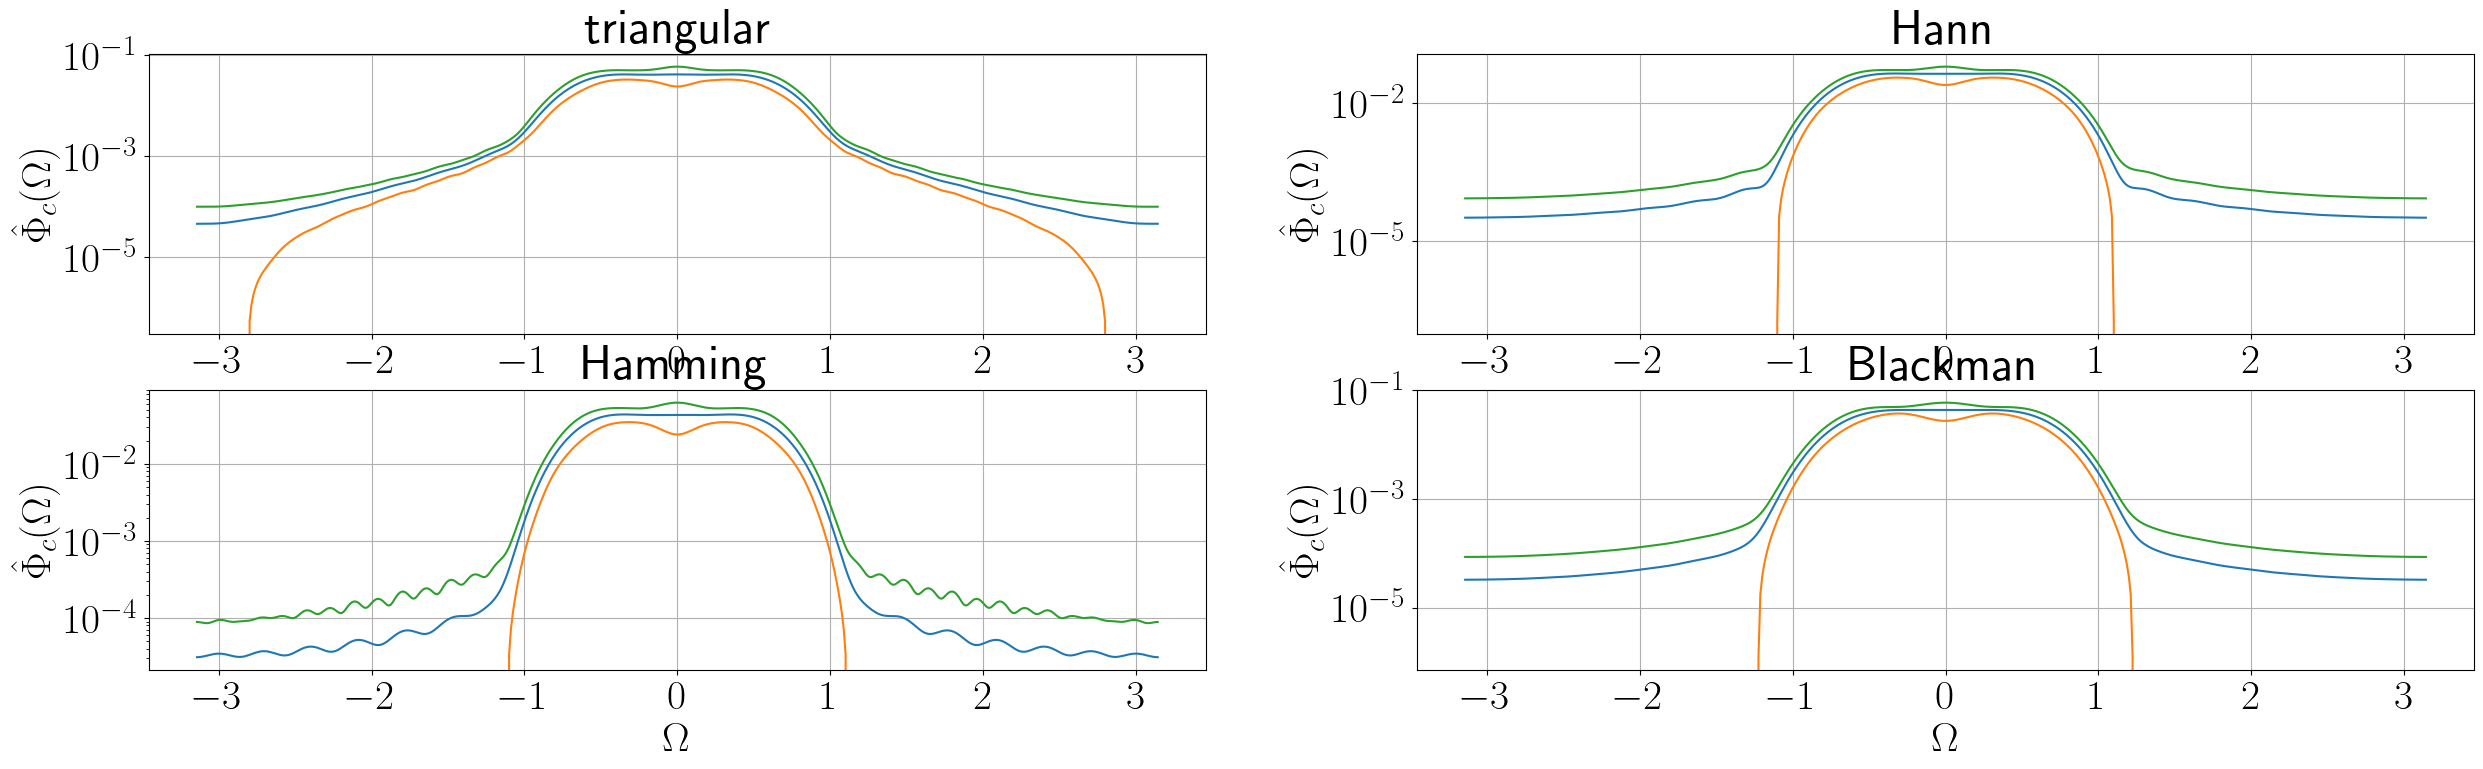

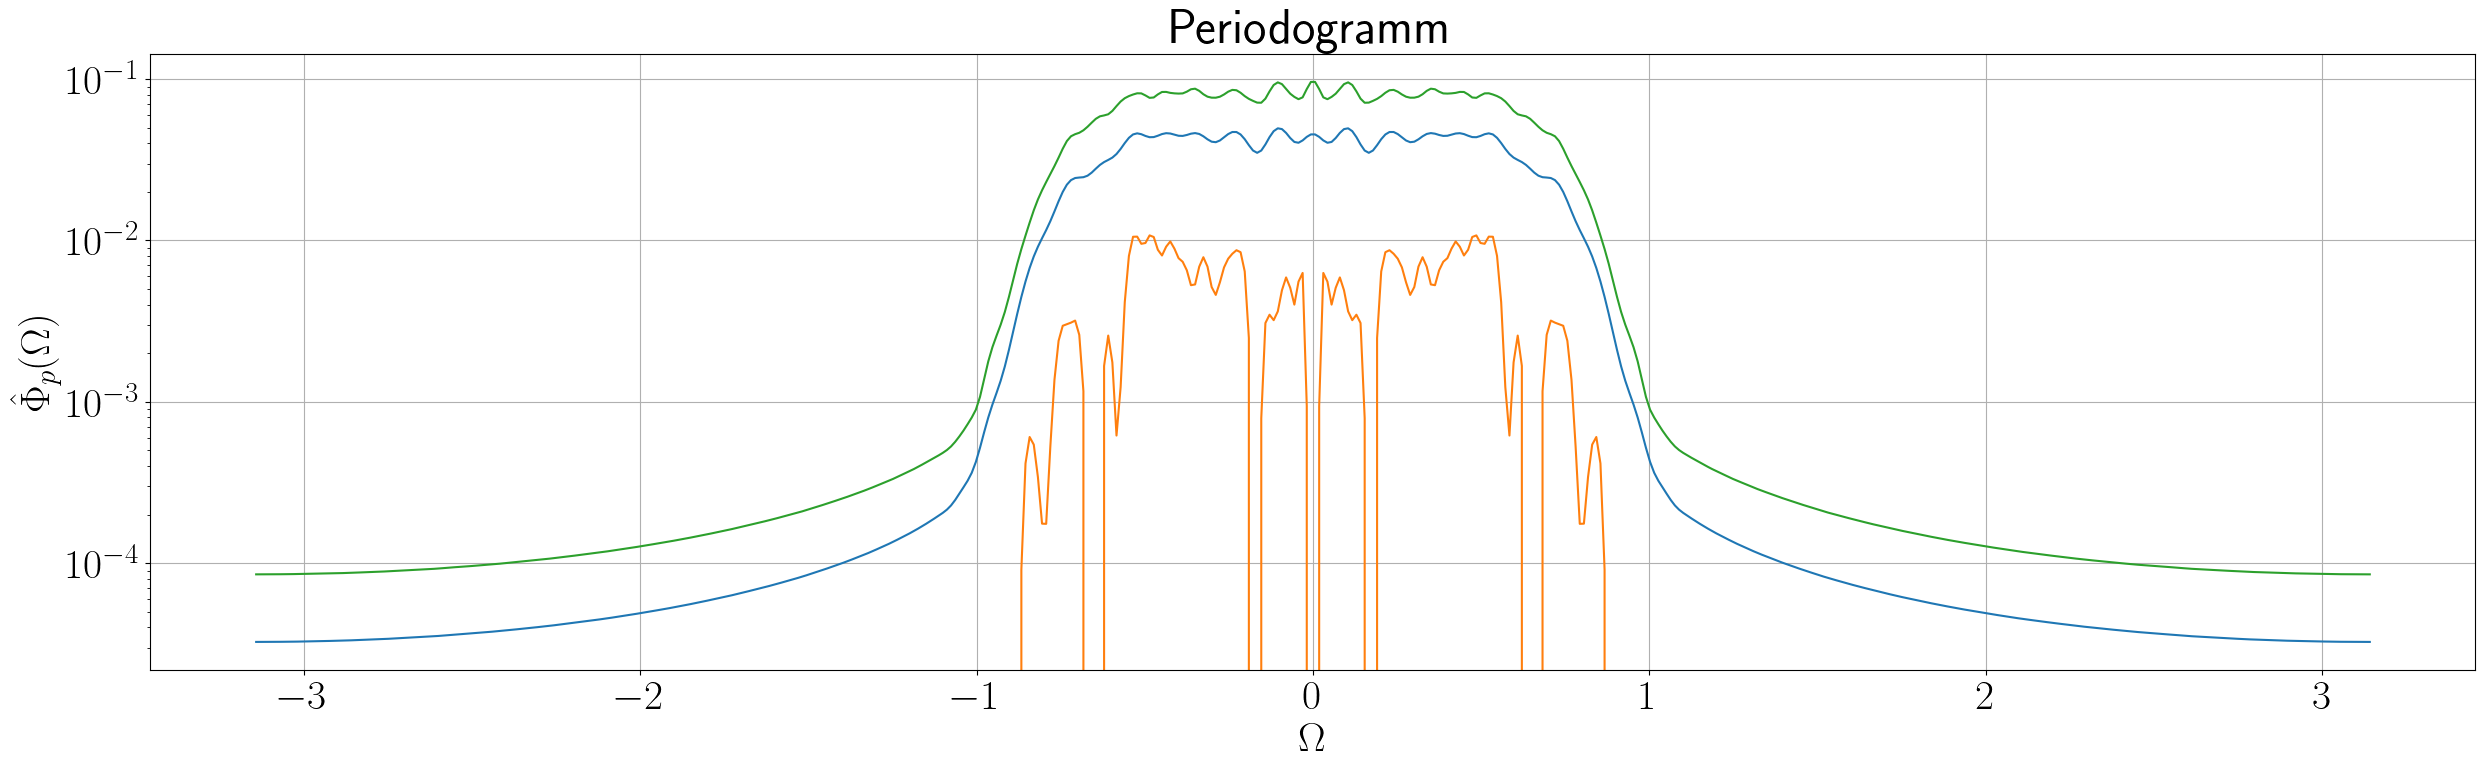

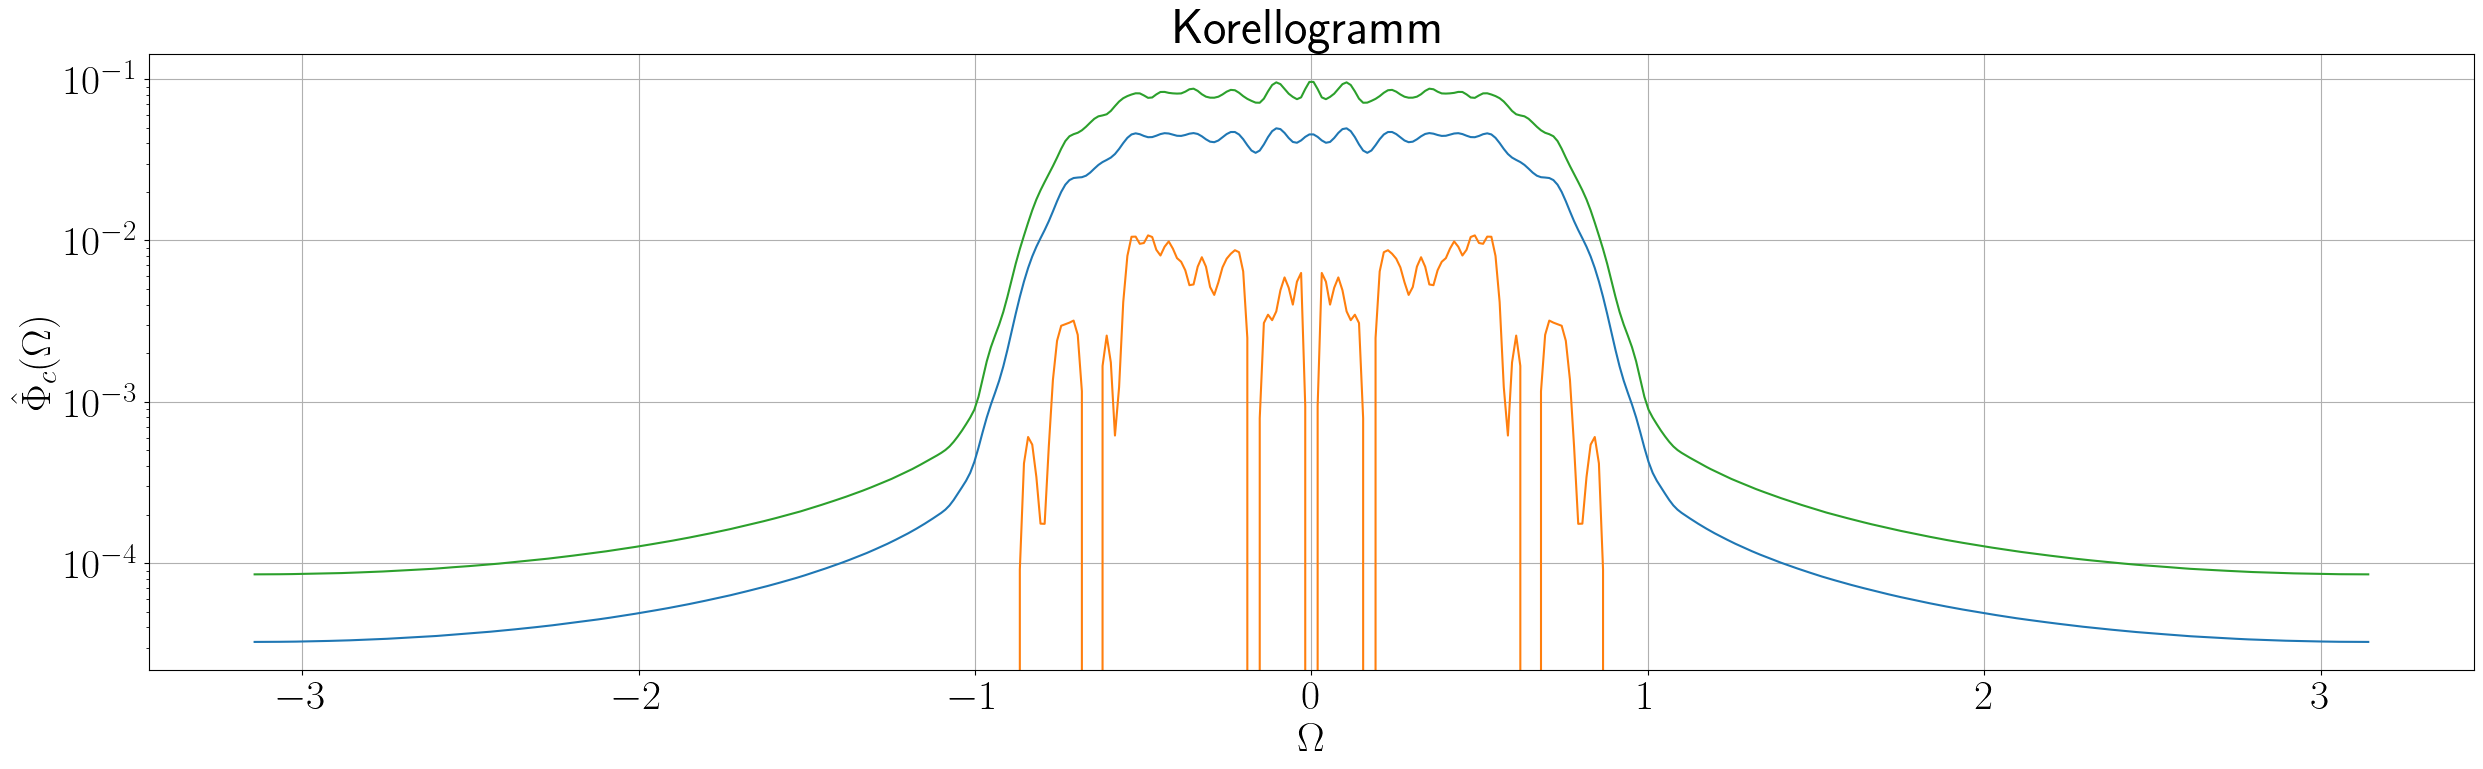

In [10]:
plt.subplot(221)    
plt.semilogy(Ome, psd_noise_cor_tria_average)      
plt.semilogy(Ome, psd_noise_cor_tria_average - psd_noise_cor_tria_std)          
plt.semilogy(Ome, psd_noise_cor_tria_average + psd_noise_cor_tria_std)  

plt.title('triangular')    
plt.grid(True); 
plt.ylabel('$\hat{\Phi}_c(\Omega)$')   


plt.subplot(222)    
plt.semilogy(Ome, psd_noise_cor_hann_average)      
plt.semilogy(Ome, psd_noise_cor_hann_average - psd_noise_cor_hann_std)          
plt.semilogy(Ome, psd_noise_cor_hann_average + psd_noise_cor_hann_std)  

plt.title('Hann')    
plt.grid(True); 
plt.ylabel('$\hat{\Phi}_c(\Omega)$')   


plt.subplot(223)        
plt.semilogy(Ome, psd_noise_cor_hamming_average)      
plt.semilogy(Ome, psd_noise_cor_hamming_average - psd_noise_cor_hamming_std)          
plt.semilogy(Ome, psd_noise_cor_hamming_average + psd_noise_cor_hamming_std)  

plt.title('Hamming')    
plt.grid(True); 
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_c(\Omega)$')   


plt.subplot(224)        
plt.semilogy(Ome, psd_noise_cor_blackman_average)      
plt.semilogy(Ome, psd_noise_cor_blackman_average - psd_noise_cor_blackman_std)          
plt.semilogy(Ome, psd_noise_cor_blackman_average + psd_noise_cor_blackman_std)  

plt.title('Blackman')    
plt.grid(True); 
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_c(\Omega)$')   

plt.figure()
plt.semilogy(np.linspace(-np.pi,np.pi,periodo_avg.size),periodo_avg)
plt.semilogy(np.linspace(-np.pi,np.pi,periodo_avg.size),periodo_avg-periodo_std)
plt.semilogy(np.linspace(-np.pi,np.pi,periodo_avg.size),periodo_avg+periodo_std)
plt.title('Periodogramm')    
plt.grid(True); 
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_p(\Omega)$')

plt.figure()
plt.semilogy(np.linspace(-np.pi,np.pi,corello_avg.size),corello_avg)
plt.semilogy(np.linspace(-np.pi,np.pi,corello_avg.size),corello_avg-corello_std)
plt.semilogy(np.linspace(-np.pi,np.pi,corello_avg.size),corello_avg+corello_std)
plt.title('Korellogramm')    
plt.grid(True); 
plt.xlabel('$\Omega$'); plt.ylabel('$\hat{\Phi}_c(\Omega)$')
